BEARR datalogger data ( clean up

In [1]:
import os
import pandas as pd


In [2]:
os.getcwd()

'g:\\Shared drives\\URSC645_S2024\\Projects\\EAD_NMG\\WorkNPR'

In [10]:
#4. Store Program Name for output files to have the same name
programname = "BEARR_Datalogger_CleanUp_v20240402"
# Make directory to save output
if not os.path.exists(programname):
    os.mkdir(programname)

In [13]:
# source folder is one directory higher than current directory
source_folder = '../SourceData/TTI_Data/'
# Quality Assurance Quality Control Bus data from Jan 18, 2024 
file_name = 'Bus2101E_01182024_1_QAQC.csv'
filepath = source_folder + file_name
# There 300+ columns but we only need a few
usecols = ['Time', 'HVES1 Voltage Level (V)', 'Latitude', 'Longitude']
df = pd.read_csv(filepath, usecols=usecols)

In [14]:
# add unique identifier for each row
df['uniquebusid'] = 'Bus2101E'
df['date'] = '01182024'

In [15]:
df.head()

,Time,HVES1 Voltage Level (V),Latitude,Longitude,uniquebusid,date
0,07:06:01,3.40,0.0,0.0,Bus2101E,01182024
1,07:06:02,3.35,0.0,0.0,Bus2101E,01182024
2,07:06:03,3.50,0.0,0.0,Bus2101E,01182024
3,07:06:04,3.50,0.0,0.0,Bus2101E,01182024
4,07:06:05,3.40,0.0,0.0,Bus2101E,01182024


In [16]:
df.describe()

,HVES1 Voltage Level (V),Latitude,Longitude
count,51575.000000,51575.000000,51575.000000
mean,672.577140,19.989338,-62.930156
std,75.909026,14.565783,45.855788
min,1.450000,0.000000,-96.355024
25%,659.100000,0.000000,-96.345104
50%,676.050000,30.592346,-96.340824
75%,698.050000,30.609540,0.000000
max,740.300000,30.618892,0.000000


In [17]:
# drop observations when lat and lon are 0
df = df[(df['Latitude'] != 0) & (df['Longitude'] != 0)]
df.describe()

,HVES1 Voltage Level (V),Latitude,Longitude
count,33688.000000,33688.000000,33688.000000
mean,656.817111,30.602888,-96.343588
std,76.297172,0.010040,0.004045
min,1.450000,30.586694,-96.355024
25%,655.500000,30.592912,-96.346680
50%,663.850000,30.605286,-96.342304
75%,675.300000,30.613156,-96.341336
max,696.200000,30.618892,-96.337448


In [18]:
# add percentage of voltage based on maximum voltage
df['HVES1 Voltage Level (%)'] = df['HVES1 Voltage Level (V)'] / df['HVES1 Voltage Level (V)'].max() * 100
df.describe()

,HVES1 Voltage Level (V),Latitude,Longitude,HVES1 Voltage Level (%)
count,33688.000000,33688.000000,33688.000000,33688.000000
mean,656.817111,30.602888,-96.343588,94.343165
std,76.297172,0.010040,0.004045,10.959088
min,1.450000,30.586694,-96.355024,0.208273
25%,655.500000,30.592912,-96.346680,94.153979
50%,663.850000,30.605286,-96.342304,95.353347
75%,675.300000,30.613156,-96.341336,96.997989
max,696.200000,30.618892,-96.337448,100.000000


In [20]:
# covert time to datetime
df['Time'] = pd.to_datetime(df['Time'])
df['Time'].head()

C:\Users\nathanael99\AppData\Local\Temp\ipykernel_66248\1166786402.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


17887   2024-04-02 12:04:08
17888   2024-04-02 12:04:09
17889   2024-04-02 12:04:10
17890   2024-04-02 12:04:11
17891   2024-04-02 12:04:12
Name: Time, dtype: datetime64[ns]

c:\Users\nathanael99\AppData\Local\miniconda3\envs\URSC645\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

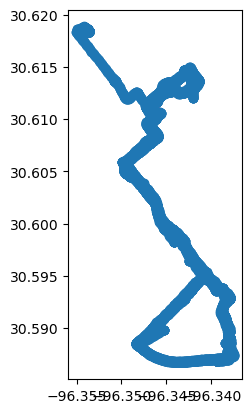

In [19]:
# convert dataframe to shapefile
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)
gdf.crs = {'init': 'epsg:4326'}
gdf.plot()

In [21]:
# Save Work at this point as CSV
savefile = programname+"/"+programname+".csv"
df.to_csv(savefile, index=False)
